Auto Encoders

You will Learn the following

Loading dataset

Preprocessing the dataset

Architecture of Vanilla Auto-encoders using CNN

Generating the image from Auto encoders

Denoising Auto Encoders

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Loading the Dataset

In [3]:
# Loading the dataset without Target Variables
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


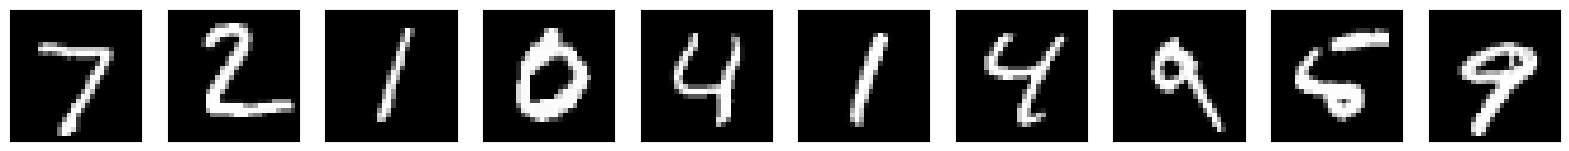

In [4]:
# Display the Loaded dataset sample images


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28*28*1))
x_test = x_test.reshape((len(x_test), 28*28*1))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


Auto Encoder using ANN

Preprocessing of Dataset

Developing Encoder, Decode and Autoencoder Models

In [6]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [7]:
input_img = Input(shape=(784,))  #Input layer
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(28, activation='relu')(encoded)

encoded = Dense(20, activation='relu', name='bot')(encoded)

decoded = Dense(28, activation='relu', name='botnext0')(encoded)
decoded = Dense(64, activation='relu', name='botnext1')(decoded)
decoded = Dense(128, activation='relu', name = 'botnext2')(decoded)
decoded = Dense(784, activation='sigmoid', name="ae_out")(decoded)

Autoencoder = Model(inputs=input_img, outputs=decoded)
Autoencoder.compile(optimizer=tf.keras.optimizers.SGD(0.09,clipvalue=2.5), loss='binary_crossentropy')#, metrics = ["accuracy"])
Autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 28)                1820      
                                                                 
 bot (Dense)                 (None, 20)                580       
                                                                 
 botnext0 (Dense)            (None, 28)                588       
                                                                 
 botnext1 (Dense)            (None, 64)                1856  

In [8]:
#Encoder Model
encoder_vn = Model(inputs = input_img, outputs= Autoencoder.get_layer("bot").output )
encoder_vn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 28)                1820      
                                                                 
 bot (Dense)                 (None, 20)                580       
                                                                 
Total params: 111136 (434.12 KB)
Trainable params: 111136 (434.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Double-click (or enter) to edit

In [9]:
encoded_input = Input(shape=(20,))
d_layer = Autoencoder.get_layer("botnext0")(encoded_input)
d_layer = Autoencoder.get_layer("botnext1")(d_layer)
d_layer = Autoencoder.get_layer("botnext2")(d_layer)
d_layer = Autoencoder.get_layer("ae_out")(d_layer)
decoder_vn = Model(inputs = encoded_input , outputs = d_layer)
decoder_vn.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 botnext0 (Dense)            (None, 28)                588       
                                                                 
 botnext1 (Dense)            (None, 64)                1856      
                                                                 
 botnext2 (Dense)            (None, 128)               8320      
                                                                 
 ae_out (Dense)              (None, 784)               101136    
                                                                 
Total params: 111900 (437.11 KB)
Trainable params: 111900 (437.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
Autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 28)                1820      
                                                                 
 bot (Dense)                 (None, 20)                580       
                                                                 
 botnext0 (Dense)            (None, 28)                588       
                                                                 
 botnext1 (Dense)            (None, 64)                1856  

In [11]:
from time import time
tic = time()
Autoencoder.fit(x_train, x_train,
                epochs=100,
                verbose=2,
                batch_size=1024,
                shuffle=True, validation_split = 0.1)
                #validation_data=(x_test, x_test))
toc = time()
print("Training Took {} Secs".format(toc-tic))

Epoch 1/100
53/53 - 9s - loss: 0.6924 - val_loss: 0.6918 - 9s/epoch - 161ms/step
Epoch 2/100
53/53 - 0s - loss: 0.6911 - val_loss: 0.6905 - 499ms/epoch - 9ms/step
Epoch 3/100
53/53 - 0s - loss: 0.6898 - val_loss: 0.6891 - 489ms/epoch - 9ms/step
Epoch 4/100
53/53 - 1s - loss: 0.6884 - val_loss: 0.6876 - 503ms/epoch - 9ms/step
Epoch 5/100
53/53 - 0s - loss: 0.6868 - val_loss: 0.6859 - 483ms/epoch - 9ms/step
Epoch 6/100
53/53 - 1s - loss: 0.6849 - val_loss: 0.6837 - 502ms/epoch - 9ms/step
Epoch 7/100
53/53 - 0s - loss: 0.6824 - val_loss: 0.6807 - 490ms/epoch - 9ms/step
Epoch 8/100
53/53 - 0s - loss: 0.6785 - val_loss: 0.6755 - 487ms/epoch - 9ms/step
Epoch 9/100
53/53 - 1s - loss: 0.6701 - val_loss: 0.6617 - 547ms/epoch - 10ms/step
Epoch 10/100
53/53 - 1s - loss: 0.6366 - val_loss: 0.5845 - 640ms/epoch - 12ms/step
Epoch 11/100
53/53 - 1s - loss: 0.4617 - val_loss: 0.3350 - 671ms/epoch - 13ms/step
Epoch 12/100
53/53 - 1s - loss: 0.3001 - val_loss: 0.2830 - 553ms/epoch - 10ms/step
Epoch 13/1

313/313 [==============================] - 1s 3ms/step
Reduced Image Representation shape achieved Through Encoder Part: (10000, 20)
313/313 [==============================] - 1s 2ms/step
Recreated image Representation of Shape (10000, 784) using Decoder and reduced Image representation of shape (10000, 20)


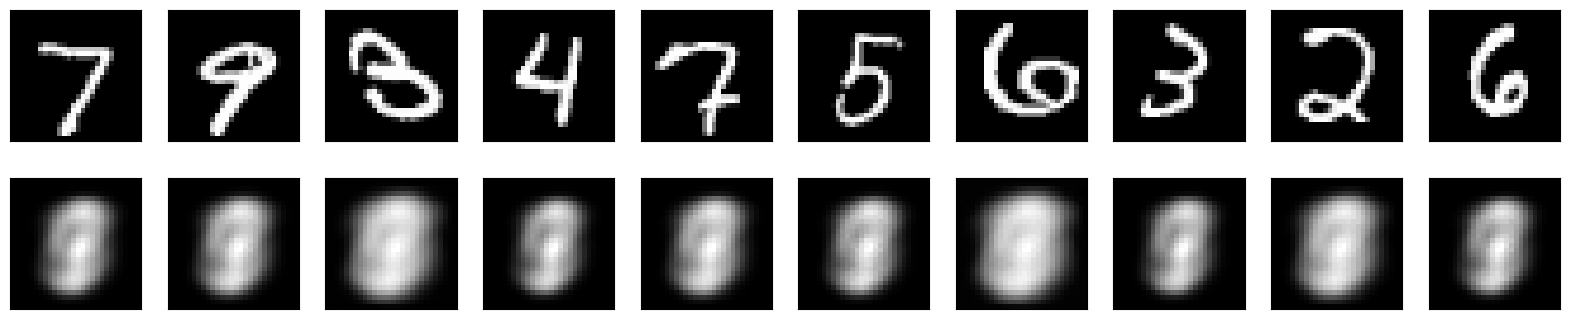

In [12]:
#encoded_imgs = encoder_l.predict(x_test)
encoded_imgs = encoder_vn.predict(x_test)
print("Reduced Image Representation shape achieved Through Encoder Part: {}".format(encoded_imgs.shape))
#decoded_imgs = decoder_l.predict(encoded_imgs)
decoded_imgs = decoder_vn.predict(encoded_imgs)
print("Recreated image Representation of Shape {} using Decoder and reduced Image representation of shape {}".format (decoded_imgs.shape, encoded_imgs.shape))
n = 10  # how many digits we will display
k = 9 #multiplier
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [13]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from tensorflow.keras.models import Model

Architecture of Auto-encoder

In [14]:
input_layer_cnv = Input(shape = (28,28,1))
ae_cnv_en = Conv2D (32, (3,3), activation = "relu", padding = "same", kernel_initializer="he_normal")(input_layer_cnv)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Conv2D (32, (3,3), activation = "relu", padding = "same")(ae_cnv_en)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Conv2D (4, (3,3), activation = "relu", padding = "same")(ae_cnv_en)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Flatten(name = "bot")(ae_cnv_en)

ae_cnv_de = Reshape((4,4,4), input_shape= (64,), name= "botnext0")(ae_cnv_en)
ae_cnv_de = Conv2D (4, (3,3), activation = "relu", padding = "same",name= "botnext1")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2),name= "botnext2")(ae_cnv_de)

ae_cnv_de = Conv2D (32, (3,3), activation = "relu", padding = "same", name= "botnext3")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2), name= "botnext4")(ae_cnv_de)

ae_cnv_de = Conv2D (32, (3,3), activation = "relu", padding = "valid",name= "botnext5")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2), name= "botnext6")(ae_cnv_de)

ae_cnv_de = Conv2D (1, (3,3), activation = "sigmoid", padding = "same",name = "botnext7")(ae_cnv_de)
Ae_Conv = Model(inputs = input_layer_cnv, outputs = ae_cnv_de)

Ae_Conv.compile(optimizer=tf.keras.optimizers.SGD(0.09,clipvalue=2.5), loss='binary_crossentropy', metrics = ["accuracy"])
# Ae_Conv.compile(optimizer=tf.keras.optimizers.Adadelta(0.1,clipvalue=2), loss='binary_crossentropy', metrics = ["accuracy"])
Ae_Conv.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 4)           1156

Encoder

In [15]:
ae_conv_encoder = Model (inputs = input_layer_cnv, outputs = Ae_Conv.get_layer("bot").output, name = "Conv_AE_encoder")
ae_conv_encoder.summary()

Model: "Conv_AE_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 4)       

Decoder

In [16]:
# Traversing through the Layers of Decoder using Loop

encode_inp_cnv = Input(shape = (64,))
tmp_dec = Ae_Conv.get_layer("botnext0")(encode_inp_cnv)
for i in range(1,8):
  st = "botnext{}".format(i)
  tmp_dec = Ae_Conv.get_layer(st)(tmp_dec)

ae_conv_decoder = Model(inputs = encode_inp_cnv, outputs = tmp_dec, name= "Conv_AE_decoder")
ae_conv_decoder.summary()

Model: "Conv_AE_decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64)]              0         
                                                                 
 botnext0 (Reshape)          (None, 4, 4, 4)           0         
                                                                 
 botnext1 (Conv2D)           (None, 4, 4, 4)           148       
                                                                 
 botnext2 (UpSampling2D)     (None, 8, 8, 4)           0         
                                                                 
 botnext3 (Conv2D)           (None, 8, 8, 32)          1184      
                                                                 
 botnext4 (UpSampling2D)     (None, 16, 16, 32)        0         
                                                                 
 botnext5 (Conv2D)           (None, 14, 14, 32)    

Reshapping the Data

In [17]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


Training the Auto Encoders

In [18]:
from time import time
tic = time()
Ae_Conv.fit(x_train, x_train,
                epochs=100,
                verbose=2,
                batch_size=1024,
                shuffle=False, validation_split = 0.1)
                #validation_data=(x_test, x_test))
toc = time()
print("Training Took {} Secs".format(toc-tic))

Epoch 1/100
53/53 - 10s - loss: 0.3830 - accuracy: 0.8032 - val_loss: 0.2937 - val_accuracy: 0.8088 - 10s/epoch - 197ms/step
Epoch 2/100
53/53 - 2s - loss: 0.2616 - accuracy: 0.8045 - val_loss: 0.2421 - val_accuracy: 0.8063 - 2s/epoch - 31ms/step
Epoch 3/100
53/53 - 2s - loss: 0.2330 - accuracy: 0.7932 - val_loss: 0.2256 - val_accuracy: 0.7952 - 2s/epoch - 32ms/step
Epoch 4/100
53/53 - 2s - loss: 0.2198 - accuracy: 0.7918 - val_loss: 0.2186 - val_accuracy: 0.8049 - 2s/epoch - 34ms/step
Epoch 5/100
53/53 - 2s - loss: 0.2107 - accuracy: 0.7909 - val_loss: 0.2045 - val_accuracy: 0.7883 - 2s/epoch - 34ms/step
Epoch 6/100
53/53 - 2s - loss: 0.2042 - accuracy: 0.7900 - val_loss: 0.2036 - val_accuracy: 0.8017 - 2s/epoch - 32ms/step
Epoch 7/100
53/53 - 2s - loss: 0.1986 - accuracy: 0.7905 - val_loss: 0.1976 - val_accuracy: 0.7877 - 2s/epoch - 32ms/step
Epoch 8/100
53/53 - 2s - loss: 0.1952 - accuracy: 0.7909 - val_loss: 0.1948 - val_accuracy: 0.8001 - 2s/epoch - 32ms/step
Epoch 9/100
53/53 - 2

Passing image to Encoder

In [19]:
encoded_imgs = ae_conv_encoder.predict(x_test)
#encoded_imgs = ae_conv_encoder.predict(x_train[0:100])
print (encoded_imgs.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 64)


Passing Compressed image Features to Decoder

313/313 [==============================] - 1s 2ms/step
Recreated image Representation of Shape (10000, 28, 28, 1) using Decoder and reduced Image representation of shape (10000, 64)


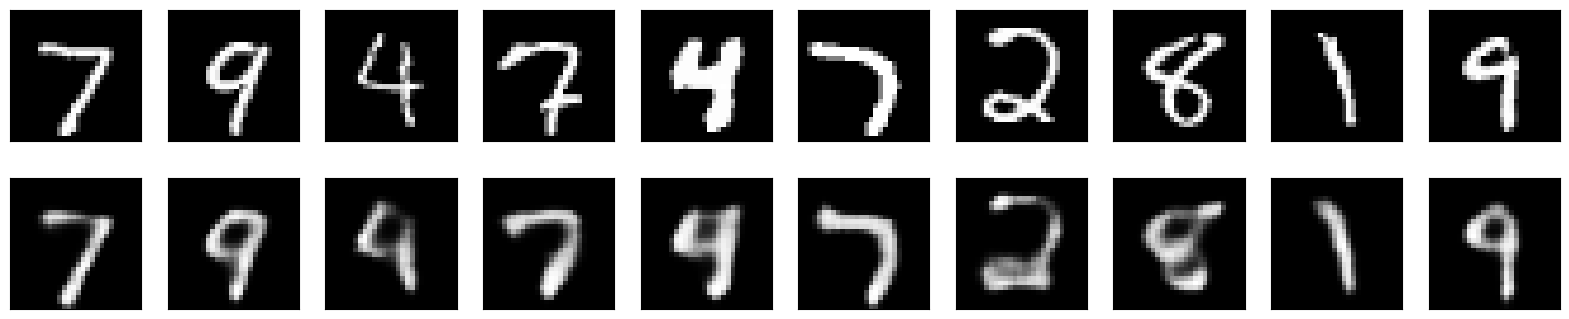

In [20]:
#decoded_imgs = ae_conv_decoder.predict(encoded_imgs)
decoded_imgs = ae_conv_decoder.predict(encoded_imgs)

deoceded_images = Ae_Conv.predict(x_test)
print("Recreated image Representation of Shape {} using Decoder and reduced Image representation of shape {}".format (decoded_imgs.shape,
                                                                                                                      encoded_imgs.shape))
n = 10  # how many digits we will display
k= 12 # multiplier
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 3ms/step
Recreated image Representation of Shape (10000, 28, 28, 1) using Decoder and reduced Image representation of shape (10000, 28, 28, 1)


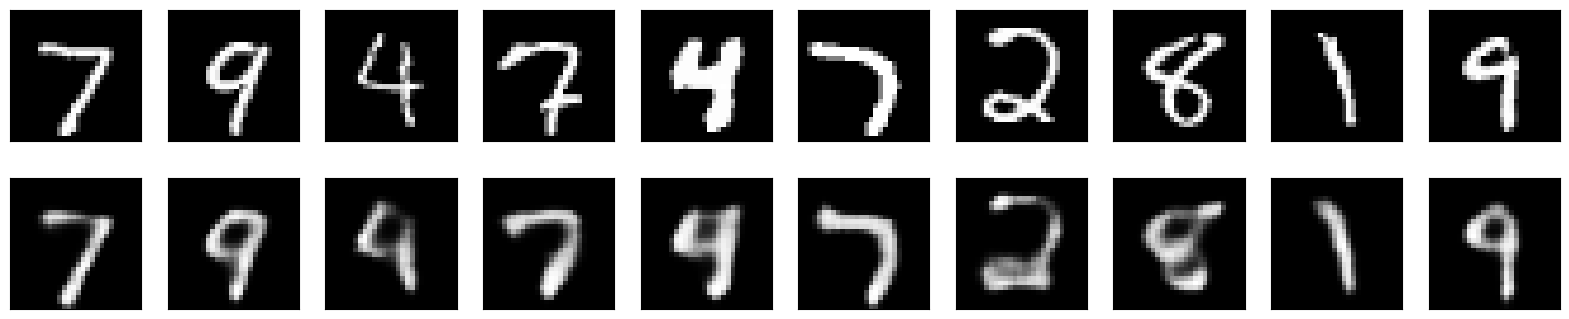

In [21]:
deoceded_images = Ae_Conv.predict(x_test)
print("Recreated image Representation of Shape {} using Decoder and reduced Image representation of shape {}".format (deoceded_images.shape,
                                                                                                                      deoceded_images.shape))
n = 10  # how many digits we will display
k= 12 # multiplier
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(deoceded_images[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Adding Noise to the Data

In [23]:
# Create Noisy Data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape,x_test_noisy.shape )

(60000, 28, 28, 1) (10000, 28, 28, 1)


Displaying the Noisy Data

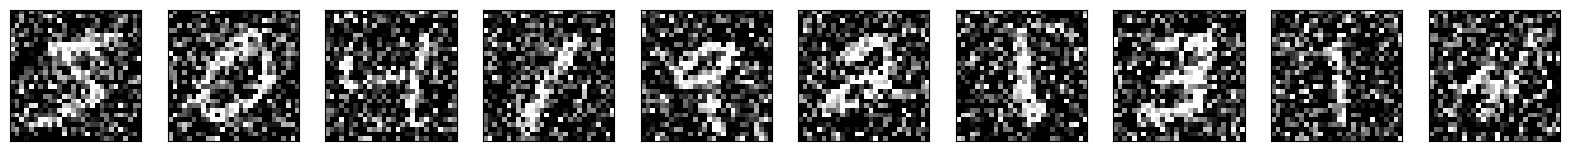

In [24]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

Architecture for Denoising Auto Encoder

In [25]:
input_layer_cnv = Input(shape = (28,28,1))
ae_cnv_en = Conv2D (32, (3,3), activation = "relu", padding = "same", kernel_initializer="he_normal")(input_layer_cnv)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Conv2D (32, (3,3), activation = "relu", padding = "same")(ae_cnv_en)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Conv2D (4, (3,3), activation = "relu", padding = "same")(ae_cnv_en)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Flatten(name = "bot")(ae_cnv_en)

ae_cnv_de = Reshape((4,4,4), input_shape= (64,), name= "botnext0")(ae_cnv_en)

ae_cnv_de = Conv2D (4, (3,3), activation = "relu", padding = "same",name= "botnext1")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2),name= "botnext2")(ae_cnv_de)

ae_cnv_de = Conv2D (32, (3,3), activation = "relu", padding = "same", name= "botnext3")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2), name= "botnext4")(ae_cnv_de)

ae_cnv_de = Conv2D (32, (3,3), activation = "relu", padding = "valid",name= "botnext5")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2), name= "botnext6")(ae_cnv_de)

ae_cnv_de = Conv2D (1, (3,3), activation = "sigmoid", padding = "same",name = "botnext7")(ae_cnv_de)
Ae_Conv_denoise = Model (inputs = input_layer_cnv, outputs = ae_cnv_de)

#Ae_Conv.compile(optimizer=tf.keras.optimizers.SGD(0.09,clipvalue=2.5), loss='binary_crossentropy', metrics = ["accuracy"])

Ae_Conv_denoise.compile(optimizer=tf.keras.optimizers.Adadelta(0.1,clipvalue=2), loss='binary_crossentropy', metrics = ["accuracy"])
Ae_Conv_denoise.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 4)           1156

Encoder

In [26]:
ae_conv_dns_encoder = Model (inputs = input_layer_cnv,outputs = Ae_Conv_denoise.get_layer("bot").output, name = "Conv_AE_dns_encoder")
ae_conv_dns_encoder.summary()

Model: "Conv_AE_dns_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 4)   

Decoder

In [27]:
encode_inp_cnv = Input(shape = (64,))
tmp_dec = Ae_Conv_denoise.get_layer("botnext0")(encode_inp_cnv)
for i in range(1,8):
  st = "botnext{}".format(i)
  tmp_dec = Ae_Conv_denoise.get_layer(st)(tmp_dec)

ae_conv_dns_decoder = Model(inputs = encode_inp_cnv,outputs = tmp_dec, name= "Conv_AE_dns_decoder")
ae_conv_dns_decoder.summary()

Model: "Conv_AE_dns_decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64)]              0         
                                                                 
 botnext0 (Reshape)          (None, 4, 4, 4)           0         
                                                                 
 botnext1 (Conv2D)           (None, 4, 4, 4)           148       
                                                                 
 botnext2 (UpSampling2D)     (None, 8, 8, 4)           0         
                                                                 
 botnext3 (Conv2D)           (None, 8, 8, 32)          1184      
                                                                 
 botnext4 (UpSampling2D)     (None, 16, 16, 32)        0         
                                                                 
 botnext5 (Conv2D)           (None, 14, 14, 32)

Training the Denoising Auto Encoder

In [28]:
from time import time
tic = time()
Ae_Conv_denoise.fit(x_train_noisy, x_train,
                epochs=100,
                verbose=2,
                batch_size=256,
                shuffle=False, validation_split = 0.1)
                #validation_data=(x_test, x_test))
toc = time()
print("Training Took {} Secs".format(toc-tic))

Epoch 1/100
211/211 - 5s - loss: 0.3250 - accuracy: 0.7936 - val_loss: 0.2583 - val_accuracy: 0.8006 - 5s/epoch - 24ms/step
Epoch 2/100
211/211 - 2s - loss: 0.2522 - accuracy: 0.7943 - val_loss: 0.2422 - val_accuracy: 0.8019 - 2s/epoch - 9ms/step
Epoch 3/100
211/211 - 2s - loss: 0.2391 - accuracy: 0.7934 - val_loss: 0.2324 - val_accuracy: 0.7996 - 2s/epoch - 9ms/step
Epoch 4/100
211/211 - 2s - loss: 0.2296 - accuracy: 0.7933 - val_loss: 0.2256 - val_accuracy: 0.7979 - 2s/epoch - 10ms/step
Epoch 5/100
211/211 - 2s - loss: 0.2232 - accuracy: 0.7931 - val_loss: 0.2205 - val_accuracy: 0.7969 - 2s/epoch - 10ms/step
Epoch 6/100
211/211 - 2s - loss: 0.2184 - accuracy: 0.7930 - val_loss: 0.2161 - val_accuracy: 0.7961 - 2s/epoch - 9ms/step
Epoch 7/100
211/211 - 2s - loss: 0.2143 - accuracy: 0.7932 - val_loss: 0.2123 - val_accuracy: 0.7954 - 2s/epoch - 9ms/step
Epoch 8/100
211/211 - 2s - loss: 0.2107 - accuracy: 0.7936 - val_loss: 0.2089 - val_accuracy: 0.7948 - 2s/epoch - 9ms/step
Epoch 9/100
2

Passing images to Encoder

In [29]:
dns_encoded_imgs = ae_conv_dns_encoder.predict(x_test_noisy)
#encoded_imgs = ae_conv_encoder.predict(x_train[0:100])
print (dns_encoded_imgs.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 64)


Passing Compressed image Features to Deccoder